In [157]:
import pandas as pd
import numpy as np
from sklearn import datasets, tree #머신러닝라이브러리, satasets함수를 사용하면 랜덤으로 70,30퍼센트를 뽑아내준다. 판매량 예측시 사용하지 않는이유 

In [158]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [159]:
featrueData = pd.read_csv("../Python_Fintech/Python_ST_EX/dataset/feature_regression_example.csv")

In [160]:
featrueData.head()

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3,1209,N,4,Y,0.208155
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,2015,4,1810,Y,2,Y,0.208155
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201505,2015,5,1773,N,4,Y,0.208155


In [161]:
featrueData.dtypes

REGIONID         object
PRODUCTGROUP     object
PRODUCT          object
ITEM             object
YEARWEEK          int64
YEAR              int64
WEEK              int64
QTY               int64
HOLIDAY          object
HCLUS             int64
PROMOTION        object
PRO_PERCENT     float64
dtype: object

In [162]:
answer2 = featrueData[(featrueData.HOLIDAY == "N")]
answer2.head()

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3,1209,N,4,Y,0.208155
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201505,2015,5,1773,N,4,Y,0.208155
5,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201506,2015,6,867,N,4,Y,0.208155
6,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201507,2015,7,1187,N,4,Y,0.208155


In [163]:
featrueData["HO_YN"] = np.where(featrueData["HOLIDAY"] == "Y",1,0)
featrueData["PRO_YN"] = np.where(featrueData["PROMOTION"] == "Y",1,0)

In [164]:
featrueData["PRO_YN"] = np.where(featrueData["PROMOTION"] == "Y",1,0)

In [165]:
featrueData.head()

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,HO_YN,PRO_YN
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442,1,1
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442,0,1
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3,1209,N,4,Y,0.208155,0,1
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,2015,4,1810,Y,2,Y,0.208155,1,1
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201505,2015,5,1773,N,4,Y,0.208155,0,1


In [166]:
#과거구간조회
FeatureData = featrueData[ (featrueData.YEARWEEK >= 201501 ) & (featrueData.YEARWEEK <= 201652) ]
FeatureData.head()

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,HO_YN,PRO_YN
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442,1,1
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442,0,1
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3,1209,N,4,Y,0.208155,0,1
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,2015,4,1810,Y,2,Y,0.208155,1,1
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201505,2015,5,1773,N,4,Y,0.208155,0,1


In [167]:
#corr상관관계에 대한 지표를 뽑아준다. (-1부터 1까지)
corrDf = FeatureData.corr()
corrDf

,YEARWEEK,YEAR,WEEK,QTY,HCLUS,PRO_PERCENT,HO_YN,PRO_YN
YEARWEEK,1.000000,0.956598,0.275593,0.112267,-0.071586,0.404889,0.049867,0.205916
YEAR,0.956598,1.000000,-0.016493,0.028931,0.028593,0.321193,-0.031106,0.195931
WEEK,0.275593,-0.016493,1.000000,0.289766,-0.339943,0.329705,0.273710,0.060206
QTY,0.112267,0.028931,0.289766,1.000000,-0.537230,0.700195,0.505932,0.612451
HCLUS,-0.071586,0.028593,-0.339943,-0.537230,1.000000,-0.545619,-0.974601,-0.374072
PRO_PERCENT,0.404889,0.321193,0.329705,0.700195,-0.545619,1.000000,0.487062,0.898554
HO_YN,0.049867,-0.031106,0.273710,0.505932,-0.974601,0.487062,1.000000,0.365148
PRO_YN,0.205916,0.195931,0.060206,0.612451,-0.374072,0.898554,0.365148,1.000000


In [168]:
#상관관계가 70프로 이상인애들만 피쳐로 선정을 하겠다. 실제는 50퍼센트 넘는게 아예 없는경우도 있다 그럴땐 머신러닝 안쓰는게 낫다. 

In [13]:
#피쳐로 50프로 넘는건 어떻게 뽑는가

### 의미있는 애들만 뽑는다.특성선정

In [169]:
#인덱스컬럼을 초기화해준다.
corrResult = corrDf.reset_index()
corrResult

,index,YEARWEEK,YEAR,WEEK,QTY,HCLUS,PRO_PERCENT,HO_YN,PRO_YN
0,YEARWEEK,1.000000,0.956598,0.275593,0.112267,-0.071586,0.404889,0.049867,0.205916
1,YEAR,0.956598,1.000000,-0.016493,0.028931,0.028593,0.321193,-0.031106,0.195931
2,WEEK,0.275593,-0.016493,1.000000,0.289766,-0.339943,0.329705,0.273710,0.060206
3,QTY,0.112267,0.028931,0.289766,1.000000,-0.537230,0.700195,0.505932,0.612451
4,HCLUS,-0.071586,0.028593,-0.339943,-0.537230,1.000000,-0.545619,-0.974601,-0.374072
5,PRO_PERCENT,0.404889,0.321193,0.329705,0.700195,-0.545619,1.000000,0.487062,0.898554
6,HO_YN,0.049867,-0.031106,0.273710,0.505932,-0.974601,0.487062,1.000000,0.365148
7,PRO_YN,0.205916,0.195931,0.060206,0.612451,-0.374072,0.898554,0.365148,1.000000


In [170]:
#비율설정50퍼센트로 featurestandard
featruesStd = 0.5
featruesStd

0.5

In [171]:
#조건걸기. 같은 YEARWEEK등 은  상관관계가 1로 출력되니 제외 abs는 절대값을 출력 
features = corrResult[(corrResult.QTY!= 1) & (abs(corrResult.QTY)> featruesStd)]["index"].tolist()
features

['HCLUS', 'PRO_PERCENT', 'HO_YN', 'PRO_YN']

In [172]:
#우리가 얻어야 할 정답지는 고정이니. LABEL은 변하지 않기때문에 써주는 것.
label = ['QTY']
label

['QTY']

### 학습시킬 7 과 검증할 기준3 분리

In [173]:
#데이터 분리 features 컬럼만 선택된 검증데이터(실제학습할 feature와 답을 같이 넣어서 지도하는 것.)
yearweekStd = 201630 # 7:3의 기준점을 딱 집어준거다 우리가 
trainingData_features = FeatureData[FeatureData.YEARWEEK <= yearweekStd][features] #특정컬름을 선택[]
trainingData_label = FeatureData[FeatureData.YEARWEEK <= yearweekStd][label]
testData_features = FeatureData[FeatureData.YEARWEEK > yearweekStd][features] #여기까지가 예측갑구한건데.
testData_label = FeatureData[FeatureData.YEARWEEK > yearweekStd] #얘를가지고 아래에서 붙혀줘 

In [19]:
#지도할 때 실제 특성과 답을 같이주고 학습을 시켜야 한다. 
#답지까지 합친다 폴드?

### 모델적용 

In [174]:
# Define Model
model_method = tree.DecisionTreeRegressor()

In [175]:
# Learning (Feature & Label) 트레이닝데이터의 (트레이닝시킬)피쳐와 모델을 파라미터를 던져주면 모델이 나온다. fit가 학습시킬 때 쓰는 함수. (training)x,y 특성과라벨을 의미 
model = model_method.fit(trainingData_features, 
trainingData_label)

In [139]:
model

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

###  예측 (특성을 집어넣으면  predic 값이 출력)

In [23]:
#검증할 feature만 넣어주면 label. 즉 predic값을 만들어 준다. 

In [176]:
# 예측 테스트데이터의 크기만큼 떨어진다? (list로 생각해도 된다. 집합을 가지고 있는 자료형이고 이건 데이터프레임으로 변환가능. 기존의 테스트 데이터와 머지시킨다. )
predict = model.predict(testData_features)
predict

array([1606.5       , 1606.5       ,  350.71428571, 1434.6       ,
       1434.6       , 1434.6       , 1434.6       , 1434.6       ,
       1606.5       , 1606.5       , 2620.42857143, 1606.5       ,
        350.71428571, 2193.8       , 2193.8       , 2193.8       ,
       2193.8       , 2193.8       , 1434.6       , 1434.6       ,
       1434.6       , 1434.6       ])

In [177]:
predicDF = pd.DataFrame(predict)
predicDF

,0
0,1606.500000
1,1606.500000
2,350.714286
3,1434.600000
4,1434.600000
5,1434.600000
6,1434.600000
7,1434.600000
8,1606.500000
9,1606.500000


In [178]:
predicDF.columns = ["PREDICT"]
predicDF

,PREDICT
0,1606.500000
1,1606.500000
2,350.714286
3,1434.600000
4,1434.600000
5,1434.600000
6,1434.600000
7,1434.600000
8,1606.500000
9,1606.500000


In [179]:
testData_label

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,HO_YN,PRO_YN
83,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201631,2016,31,1522,N,4,Y,0.280258,0,1
84,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201632,2016,32,2100,N,4,Y,0.280258,0,1
85,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201633,2016,33,43,N,4,N,0.000000,0,0
86,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201634,2016,34,1700,Y,1,Y,0.308584,1,1
87,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201635,2016,35,1514,Y,1,Y,0.308584,1,1
88,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201636,2016,36,1501,Y,1,Y,0.308584,1,1
89,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201637,2016,37,1491,N,4,Y,0.308584,0,1
90,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201638,2016,38,806,N,4,Y,0.308584,0,1
91,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201639,2016,39,2111,N,4,Y,0.280258,0,1
92,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201640,2016,40,2400,N,4,Y,0.280258,0,1


### 예측값과 test label concat하기

In [180]:
testData_label.reset_index(inplace = True) #인플레이스 true안하려면 그냥 변수에 담아줘라  resetindex는 필수 
testData_label

,index,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,HO_YN,PRO_YN
0,83,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201631,2016,31,1522,N,4,Y,0.280258,0,1
1,84,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201632,2016,32,2100,N,4,Y,0.280258,0,1
2,85,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201633,2016,33,43,N,4,N,0.000000,0,0
3,86,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201634,2016,34,1700,Y,1,Y,0.308584,1,1
4,87,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201635,2016,35,1514,Y,1,Y,0.308584,1,1
5,88,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201636,2016,36,1501,Y,1,Y,0.308584,1,1
6,89,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201637,2016,37,1491,N,4,Y,0.308584,0,1
7,90,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201638,2016,38,806,N,4,Y,0.308584,0,1
8,91,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201639,2016,39,2111,N,4,Y,0.280258,0,1
9,92,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201640,2016,40,2400,N,4,Y,0.280258,0,1


In [181]:
finalResult = pd.concat([testData_label,predicDF], axis = 1) #위아래로 합칠 때는 컬럼이 같아야하고 좌우로 붙힐땐 인덱스가 중요하다 
finalResult

,index,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,HO_YN,PRO_YN,PREDICT
0,83,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201631,2016,31,1522,N,4,Y,0.280258,0,1,1606.500000
1,84,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201632,2016,32,2100,N,4,Y,0.280258,0,1,1606.500000
2,85,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201633,2016,33,43,N,4,N,0.000000,0,0,350.714286
3,86,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201634,2016,34,1700,Y,1,Y,0.308584,1,1,1434.600000
4,87,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201635,2016,35,1514,Y,1,Y,0.308584,1,1,1434.600000
5,88,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201636,2016,36,1501,Y,1,Y,0.308584,1,1,1434.600000
6,89,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201637,2016,37,1491,N,4,Y,0.308584,0,1,1434.600000
7,90,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201638,2016,38,806,N,4,Y,0.308584,0,1,1434.600000
8,91,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201639,2016,39,2111,N,4,Y,0.280258,0,1,1606.500000
9,92,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201640,2016,40,2400,N,4,Y,0.280258,0,1,1606.500000


In [30]:
# testCc.to_csv("test.csv")

NameError: name 'testCc' is not defined

In [ ]:
#새컬럼에 다른 데이터의 컬럼을 가져와도 된다. 굳이 concat안하고 다른사람이 푼거 보자 

###  정확도측정

In [ ]:
# 정확도 측정은 무슨 의미를 가지고 있나요? 

In [145]:
### MAE 정답지와 결과값이?
mean_absolute_error(finalResult['QTY'], finalResult['PREDICT'])

566.617239476098

In [53]:
import math

In [54]:
### RMSE (MSE) maht.sqrt () 루트씌우기 
math.sqrt(mean_squared_error(finalResult['QTY'], finalResult['PREDICT']))

603.7396042425769

In [55]:
### R2
r2_score(finalResult['QTY'], finalResult['PREDICT']) 

0.21932322337186283

### 시각화

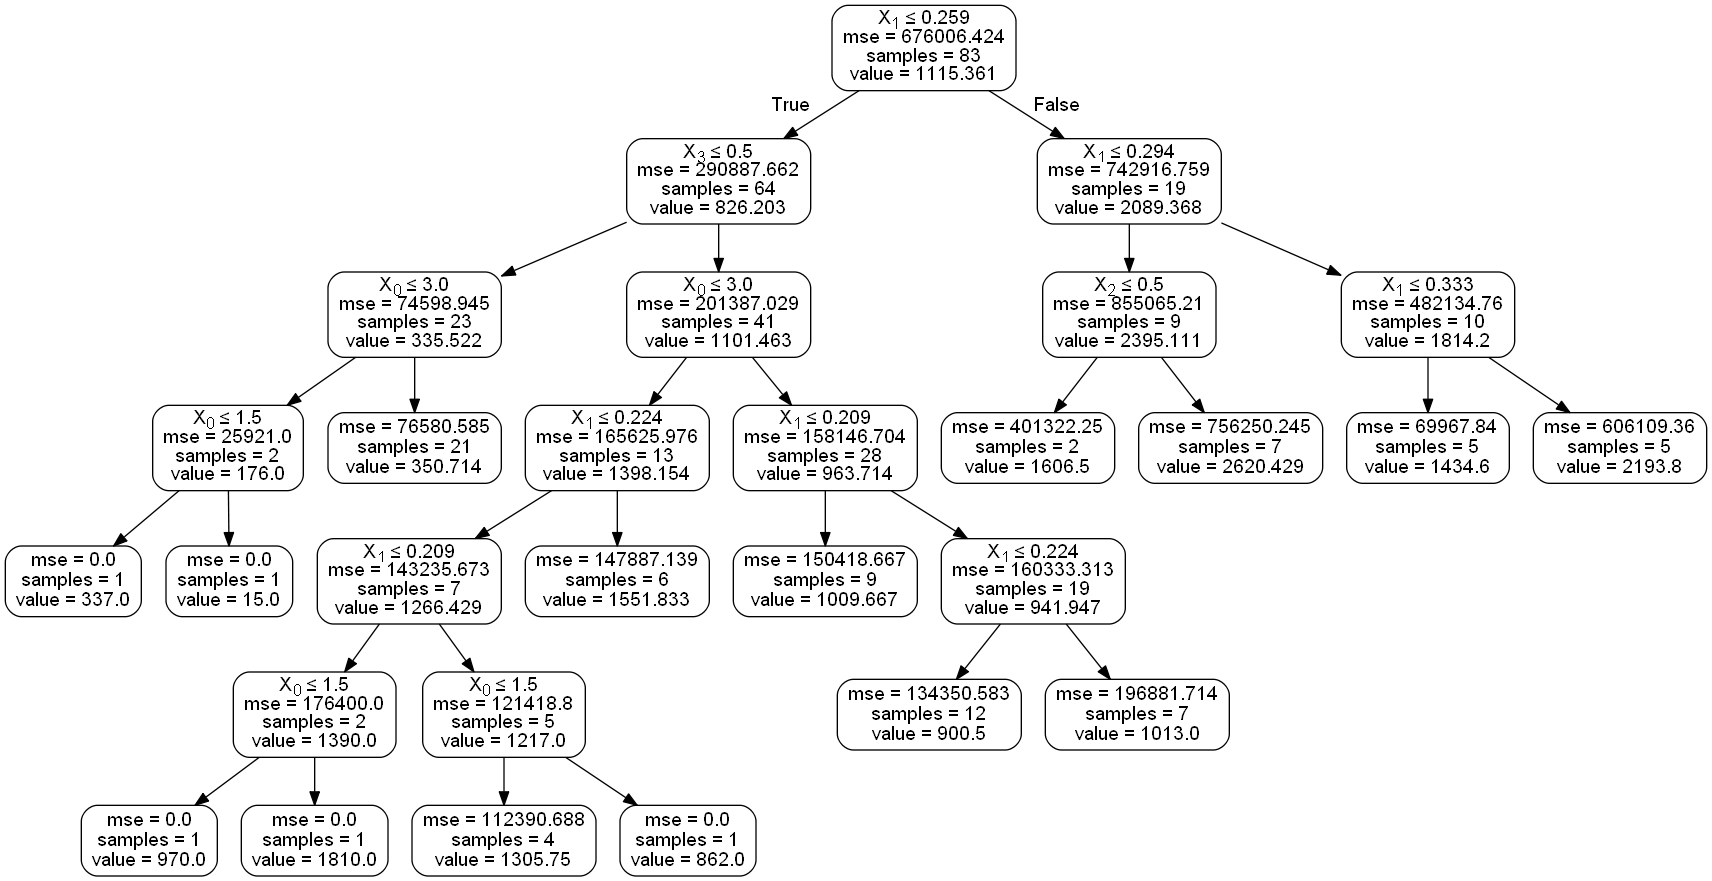

In [56]:
from sklearn.externals.six import StringIO  #피쳐와 라벨을 학습시킨 결과를 보여준다 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data, 
                rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

###  # basic linear regression


In [182]:
import pandas as pd
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#이미 나눠놓은데이터trainingData_features,trainingData_label

In [183]:
model_method1 = linear_model.LinearRegression()

In [184]:
model1 = model_method1.fit(trainingData_features, 
trainingData_label)

In [185]:
model1.fit(trainingData_features[features], trainingData_label[label])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [186]:
model1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [187]:
predict1 = model1.predict(testData_features)
predict1

array([[1411.29171929],
       [1411.29171929],
       [ 300.43091536],
       [2004.96200456],
       [2004.96200456],
       [2004.96200456],
       [1586.12154967],
       [1586.12154967],
       [1411.29171929],
       [1411.29171929],
       [1799.54021119],
       [1411.29171929],
       [ 300.43091536],
       [2734.87329525],
       [2734.87329525],
       [2734.87329525],
       [2734.87329525],
       [2734.87329525],
       [2285.44087736],
       [1856.31310796],
       [1856.31310796],
       [2275.15356285]])

In [188]:
predicDF1 = pd.DataFrame(predict1)

In [189]:
predicDF1.columns = ["LINEAR"]
predicDF1

,LINEAR
0,1411.291719
1,1411.291719
2,300.430915
3,2004.962005
4,2004.962005
5,2004.962005
6,1586.121550
7,1586.121550
8,1411.291719
9,1411.291719


In [190]:
finalResult1 = pd.concat([testData_label,predicDF1], axis = 1) #위아래로 합칠 때는 컬럼이 같아야하고 좌우로 붙힐땐 인덱스가 중요하다 
finalResult1

,index,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,HO_YN,PRO_YN,LINEAR
0,83,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201631,2016,31,1522,N,4,Y,0.280258,0,1,1411.291719
1,84,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201632,2016,32,2100,N,4,Y,0.280258,0,1,1411.291719
2,85,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201633,2016,33,43,N,4,N,0.000000,0,0,300.430915
3,86,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201634,2016,34,1700,Y,1,Y,0.308584,1,1,2004.962005
4,87,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201635,2016,35,1514,Y,1,Y,0.308584,1,1,2004.962005
5,88,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201636,2016,36,1501,Y,1,Y,0.308584,1,1,2004.962005
6,89,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201637,2016,37,1491,N,4,Y,0.308584,0,1,1586.121550
7,90,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201638,2016,38,806,N,4,Y,0.308584,0,1,1586.121550
8,91,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201639,2016,39,2111,N,4,Y,0.280258,0,1,1411.291719
9,92,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201640,2016,40,2400,N,4,Y,0.280258,0,1,1411.291719


In [191]:
finalResult

,index,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,HO_YN,PRO_YN,PREDICT
0,83,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201631,2016,31,1522,N,4,Y,0.280258,0,1,1606.500000
1,84,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201632,2016,32,2100,N,4,Y,0.280258,0,1,1606.500000
2,85,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201633,2016,33,43,N,4,N,0.000000,0,0,350.714286
3,86,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201634,2016,34,1700,Y,1,Y,0.308584,1,1,1434.600000
4,87,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201635,2016,35,1514,Y,1,Y,0.308584,1,1,1434.600000
5,88,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201636,2016,36,1501,Y,1,Y,0.308584,1,1,1434.600000
6,89,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201637,2016,37,1491,N,4,Y,0.308584,0,1,1434.600000
7,90,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201638,2016,38,806,N,4,Y,0.308584,0,1,1434.600000
8,91,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201639,2016,39,2111,N,4,Y,0.280258,0,1,1606.500000
9,92,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201640,2016,40,2400,N,4,Y,0.280258,0,1,1606.500000


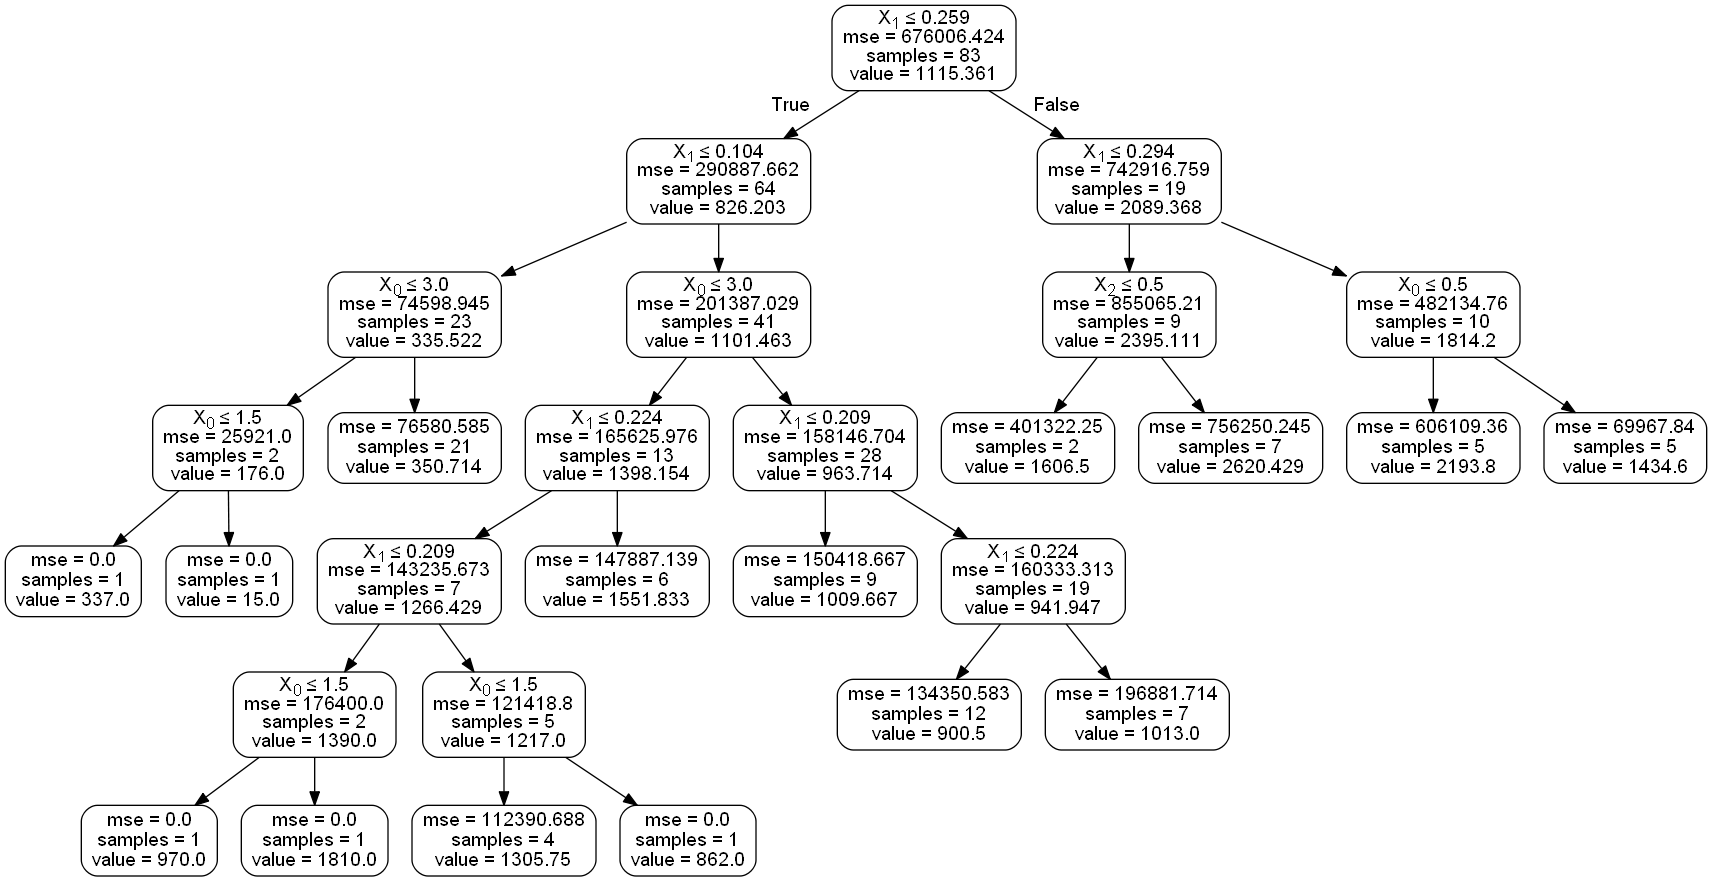

In [193]:
from sklearn.externals.six import StringIO  #피쳐와 라벨을 학습시킨 결과를 보여준다 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data, 
                rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [194]:
finalResult1[["LINEAR"]].head(5)

,LINEAR
0,1411.291719
1,1411.291719
2,300.430915
3,2004.962005
4,2004.962005


In [195]:
finalResult2 = pd.concat([finalResult,predicDF1], axis = 1) #위아래로 합칠 때는 컬럼이 같아야하고 좌우로 붙힐땐 인덱스가 중요하다 
finalResult2

,index,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,HO_YN,PRO_YN,PREDICT,LINEAR
0,83,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201631,2016,31,1522,N,4,Y,0.280258,0,1,1606.500000,1411.291719
1,84,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201632,2016,32,2100,N,4,Y,0.280258,0,1,1606.500000,1411.291719
2,85,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201633,2016,33,43,N,4,N,0.000000,0,0,350.714286,300.430915
3,86,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201634,2016,34,1700,Y,1,Y,0.308584,1,1,1434.600000,2004.962005
4,87,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201635,2016,35,1514,Y,1,Y,0.308584,1,1,1434.600000,2004.962005
5,88,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201636,2016,36,1501,Y,1,Y,0.308584,1,1,1434.600000,2004.962005
6,89,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201637,2016,37,1491,N,4,Y,0.308584,0,1,1434.600000,1586.121550
7,90,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201638,2016,38,806,N,4,Y,0.308584,0,1,1434.600000,1586.121550
8,91,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201639,2016,39,2111,N,4,Y,0.280258,0,1,1606.500000,1411.291719
9,92,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201640,2016,40,2400,N,4,Y,0.280258,0,1,1606.500000,1411.291719


### 시각화하기

In [197]:
import matplotlib.pyplot as plt

In [203]:
x= finalResult2["YEARWEEK"]
y= finalResult2["QTY"]
y2 = finalResult2["LINEAR"]
y3 = finalResult2["PREDICT"]

Text(0.5,1,'subplot')

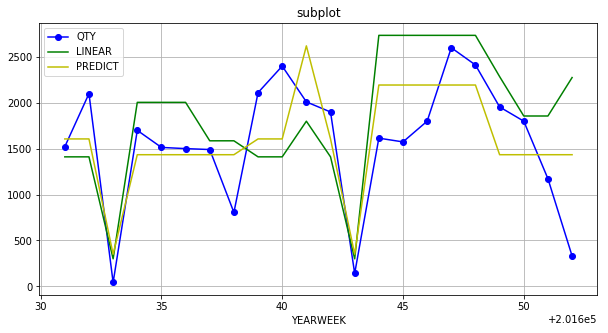

In [206]:
fig = plt.figure(figsize=(10,5)) # 1. 도화지만든다
ax1 = fig.add_subplot(1,1,1) # 1행1열에 하나 즉 하나만 만든다.
plt.plot(x,y, 'bo-',lw=1.5, label='QTY')
plt.plot(x,y2, 'g', lw=1.5, label='LINEAR')
plt.plot(x,y3, 'y', lw=1.5, label='PREDICT')
plt.grid(True) #선표시
plt.legend(loc=2)
plt.xlabel('YEARWEEK')
plt.title('subplot')